<h1>https://github.com/nguyenvo09/LearningFromFactCheckers<h1>

In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
with open("processed/train.jsonl", "r") as f:
    read_str = f.read()

read_lines = read_str.split("\n")
train_mentions = []

for line in read_lines:
    train_mentions.append(json.loads(line))

df_train = pd.DataFrame(train_mentions)

In [3]:
with open("processed/valid.jsonl", "r") as f:
    read_str = f.read()

read_lines = read_str.split("\n")
valid_mentions = []

for line in read_lines:
    valid_mentions.append(json.loads(line))

df_val = pd.DataFrame(valid_mentions)

In [4]:
with open("processed/test.jsonl", "r") as f:
    read_str = f.read()

read_lines = read_str.split("\n")
test_mentions = []

for line in read_lines:
    test_mentions.append(json.loads(line))

df_test = pd.DataFrame(test_mentions)

In [5]:
df_train.head()

,mention,mention_id,context_left,context_right,context_doc_id,type,label_id,label,label_title
0,The families of these four should sit in the f...,780136889441456128,,,,,272,,
1,user person didnt lower my my taxes and he rai...,913075551212011520,,,,,273,,
2,JaredBerry316 glennbeck like when white Christ...,753045148775440384,,,,,274,,
3,AdamKazda 60 diplomats were killed on Bushs wa...,743830161393520640,,,,,14,,
4,fight4women Wow you got a source for all that ...,818188352314900480,,,,,275,,


In [6]:
df_test.head()

,mention,mention_id,context_left,context_right,context_doc_id,type,label_id,label,label_title
0,lets not forget the gop has ostracized person ...,896547967645122560,,,,,186,,
1,user now yall nothing to say keep believing in...,917966145168334848,,,,,47,,
2,remember when person said we didnt lose a sing...,791407718267514880,,,,,272,,
3,user number diplomats were killed on bushs wat...,821773847414378496,,,,,272,,
4,user wow you got a source for all that bs i th...,796830055250935808,,,,,892,,


In [7]:
df_val.head()

,mention,mention_id,context_left,context_right,context_doc_id,type,label_id,label,label_title
0,a look at how the hashtag law i authored with ...,843200839397261312,,,,,335,,
1,user oh for gods sake if you must have him on ...,995011079917875200,,,,,292,,
2,user and i have had enough of our lawmakers in...,977543949098381312,,,,,557,,
3,user this guy like the neon deion of presidents,914520547635101696,,,,,336,,
4,or maybe someone else remember person is also ...,924127285938180096,,,,,295,,


In [9]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(42655, 9)
(5214, 9)
(5202, 9)


In [12]:
len(set(df_train.label_id.values))

3100

In [13]:
len(set(df_val.label_id.values))

1342

In [15]:
len(set(df_test.label_id.values))

1376

In [16]:
df_temp=pd.concat([df_train, df_val], ignore_index=True)
df = pd.concat([df_temp, df_test], ignore_index=True)

In [17]:
df.shape

(53071, 9)

In [20]:
count_df = df.groupby('label_id')['mention_id'].count()
count_df = pd.DataFrame(count_df)

In [21]:
count_df

,mention_id
label_id,
0,39
1,12
10,7
100,9
1000,1
...,...
994,1
995,1
997,1


In [22]:
count_df = count_df.reset_index(level=['label_id'])

In [23]:
count_df.rename(columns={'label_id':'cluster/entity', 'mention_id':'num_mentions'}, inplace=True)

In [24]:
count_df.to_csv('num_mentions.csv')

In [25]:
print(f"Number of Total Clusters===> {count_df.shape[0]}")

Number of Total Clusters===> 3346


In [26]:
print(f"Number of Non-Singleton Clusters===> {count_df[count_df['num_mentions']!=1].shape[0]}")

Number of Non-Singleton Clusters===> 2349


In [27]:
hist_counts = count_df.groupby('num_mentions').count().reset_index(level='num_mentions').rename(columns={'cluster/entity': 'num_cluster'})

In [28]:
hist_counts_trial = count_df.groupby('num_mentions').count()

In [29]:
hist_counts_trial = hist_counts_trial.rename(columns={'cluster/entity': 'num_cluster'})

In [30]:
hist_counts_trial

,num_cluster
num_mentions,
1,997
2,475
3,282
4,206
5,158
...,...
509,1
579,1
767,1


In [31]:
hist_counts.loc[1:]

,num_mentions,num_cluster
1,2,475
2,3,282
3,4,206
4,5,158
5,6,133
...,...,...
170,509,1
171,579,1
172,767,1
173,822,1


<AxesSubplot:xlabel='num_mentions'>

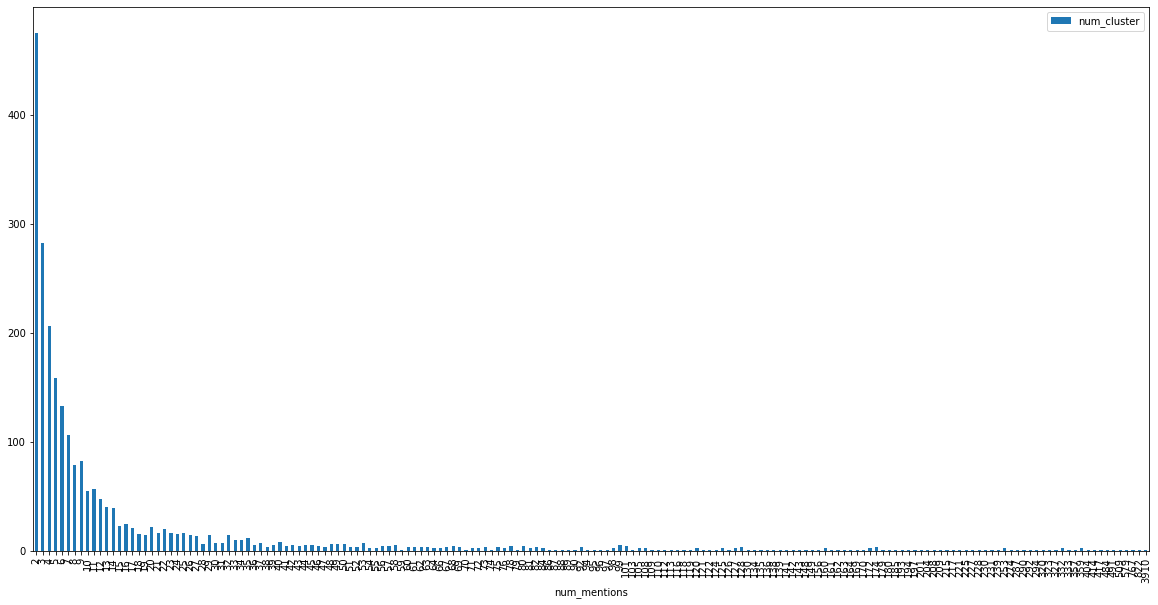

In [33]:
hist_counts.loc[1:].plot.bar(x='num_mentions', y='num_cluster', figsize = (20,10))

In [34]:
hist_counts.to_csv("hist.csv")

In [35]:
hist_counts.iloc[:]

,num_mentions,num_cluster
0,1,997
1,2,475
2,3,282
3,4,206
4,5,158
...,...,...
170,509,1
171,579,1
172,767,1
173,822,1


array([[<AxesSubplot:title={'center':'num_cluster'}>]], dtype=object)

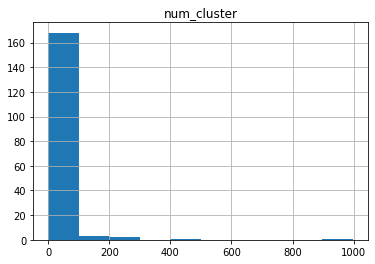

In [36]:
import matplotlib.pyplot as plt

hist_counts_trial.hist()

In [37]:
hist_counts_trial

,num_cluster
num_mentions,
1,997
2,475
3,282
4,206
5,158
...,...
509,1
579,1
767,1
